<a href="https://colab.research.google.com/github/alirezakavianifar/machineLearning/blob/main/handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train = X_train.reshape(len(X_train), 28 * 28)

In [7]:
X_test = X_test.reshape(len(X_test), 28 * 28)

In [20]:
model = keras.Sequential([
                        keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')
                          ])

model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              ) 

model.fit(X_train, y_train, epochs=5)                        

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2678 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1244 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0675 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9833


In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9725


[0.08529867976903915, 0.9725000262260437]

In [22]:
y_predicted = model.predict(X_test)

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    4,    2,    1,    0,    3,    1,    2,    0],
       [   0, 1126,    4,    0,    0,    1,    2,    0,    2,    0],
       [   4,    7, 1008,    2,    1,    0,    4,    1,    5,    0],
       [   0,    0,    4,  988,    0,   10,    1,    1,    4,    2],
       [   0,    0,    3,    0,  948,    0,   12,    2,    1,   16],
       [   3,    1,    1,    5,    1,  872,    9,    0,    0,    0],
       [   2,    3,    2,    1,    4,    3,  943,    0,    0,    0],
       [   1,   13,   14,    9,    2,    0,    0,  976,    3,   10],
       [   5,    2,    1,   15,    5,   10,    6,    0,  927,    3],
       [   4,    6,    0,   11,    7,    2,    1,    7,    1,  970]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

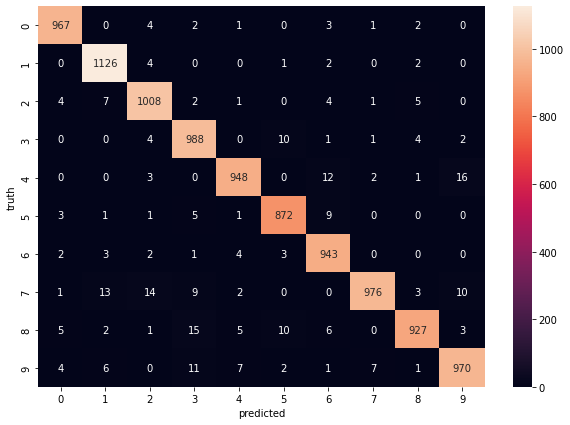

In [25]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')